## Datapoints

In [1]:
import numpy as np
from rdkit import Chem
from chemprop.data.datapoints import MoleculeDatapoint, ReactionDatapoint

### Molecule Datapoints

`MoleculeDatapoint`s are made from target value(s) and either a `rdkit.Chem.Mol` object or a SMILES.

In [2]:
mol = Chem.MolFromInchi("InChI=1S/C2H6/c1-2/h1-2H3")
smi = "CC"
n_targets = 1
y = np.random.rand(n_targets)

In [3]:
MoleculeDatapoint(mol, y)

MoleculeDatapoint(mol=<rdkit.Chem.rdchem.Mol object at 0x7f75d7a1d150>, y=array([0.59457356]), weight=1.0, gt_mask=None, lt_mask=None, x_d=None, x_phase=None, name=None, V_f=None, E_f=None, V_d=None)

In [4]:
MoleculeDatapoint.from_smi(smi, y)

MoleculeDatapoint(mol=<rdkit.Chem.rdchem.Mol object at 0x7f75d7a1d310>, y=array([0.59457356]), weight=1.0, gt_mask=None, lt_mask=None, x_d=None, x_phase=None, name='CC', V_f=None, E_f=None, V_d=None)

### Hydrogens in the graph

Explicit hydrogens in the graph created by `from_smi` can be controlled using `keep_h` and `add_h`.

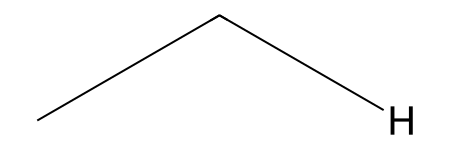

In [5]:
MoleculeDatapoint.from_smi("[H]CC", y, keep_h=True).mol

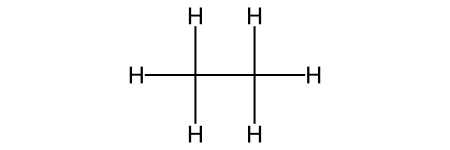

In [6]:
MoleculeDatapoint.from_smi(smi, y, add_h=True).mol

### Other datapoint properties

Datapoints can be individually weighted in the loss function.

In [7]:
MoleculeDatapoint.from_smi(smi, y, weight=0.5)

MoleculeDatapoint(mol=<rdkit.Chem.rdchem.Mol object at 0x7f75d7a1d850>, y=array([0.59457356]), weight=0.5, gt_mask=None, lt_mask=None, x_d=None, x_phase=None, name='CC', V_f=None, E_f=None, V_d=None)

A string identifier (e.g. a name) can be assigned to a datapoint. If a SMILES is used to make the datapoint, the name defaults to the SMILES, but this can be overwritten.

In [8]:
MoleculeDatapoint(mol, y, name="Ethane")

MoleculeDatapoint(mol=<rdkit.Chem.rdchem.Mol object at 0x7f75d7a1d150>, y=array([0.59457356]), weight=1.0, gt_mask=None, lt_mask=None, x_d=None, x_phase=None, name='Ethane', V_f=None, E_f=None, V_d=None)

In [9]:
MoleculeDatapoint.from_smi(smi, y, name="Ethane")

MoleculeDatapoint(mol=<rdkit.Chem.rdchem.Mol object at 0x7f75d7a1dee0>, y=array([0.59457356]), weight=1.0, gt_mask=None, lt_mask=None, x_d=None, x_phase=None, name='Ethane', V_f=None, E_f=None, V_d=None)

### Extra features and descriptors

Extra datapoint descriptors (like [molecule features](../featurizers/molecule_featurizers.ipynb)) will be concatenated to the learned descriptors from message passing and used in the FFN. They are called `x_d`. 

In [10]:
n_extra_descriptors = 3
MoleculeDatapoint.from_smi(smi, y, x_d=np.random.rand(n_extra_descriptors))

MoleculeDatapoint(mol=<rdkit.Chem.rdchem.Mol object at 0x7f75d7a1e030>, y=array([0.59457356]), weight=1.0, gt_mask=None, lt_mask=None, x_d=array([0.19862451, 0.02291258, 0.53947526]), x_phase=None, name='CC', V_f=None, E_f=None, V_d=None)

Extra atom features, bond features, and atom descriptors are called `V_f`, `E_f`, `V_d`. In this context, features are used before the message passing operations, while descriptors are used after. Extra bond descriptors aren't currently supported as aggregation ignores the final bond (edge) representations. 

In [11]:
n_atoms = 2
n_bonds = 1
n_extra_atom_features = 3
n_extra_bond_features = 4
n_extra_atom_descriptors = 5
extra_atom_features = np.random.rand(n_atoms, n_extra_atom_features)
extra_bond_features = np.random.rand(n_bonds, n_extra_bond_features)
extra_atom_descriptors = np.random.rand(n_atoms, n_extra_atom_descriptors)
MoleculeDatapoint.from_smi(
    smi, y, V_f=extra_atom_features, E_f=extra_bond_features, V_d=extra_atom_descriptors
)

MoleculeDatapoint(mol=<rdkit.Chem.rdchem.Mol object at 0x7f75d7a1e180>, y=array([0.59457356]), weight=1.0, gt_mask=None, lt_mask=None, x_d=None, x_phase=None, name='CC', V_f=array([[0.87607713, 0.13445326, 0.30956766],
       [0.30211101, 0.71958856, 0.59585268]]), E_f=array([[0.2701559 , 0.69410415, 0.33873434, 0.75421698]]), V_d=array([[0.65657485, 0.28960245, 0.02924757, 0.96329654, 0.19256428],
       [0.09170231, 0.90034745, 0.54722667, 0.8426991 , 0.91075757]]))

### Reaction Datapoints

`ReactionDatapoint`s are the same as for molecules expect for:
1. extra atom features, bond features, and atom descriptors are not supported
2. both reactant and product `rdkit.Chem.Mol` objects or SMILES are required

In [12]:
# Keep the atom mapping for hydrogens
rct = Chem.MolFromSmiles("[H:1][C:4]([H:2])([H:3])[F:5]", sanitize=False)
pdt = Chem.MolFromSmiles("[H:1][C:4]([H:2])([H:3]).[F:5]", sanitize=False)
Chem.SanitizeMol(
    rct, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ Chem.SanitizeFlags.SANITIZE_ADJUSTHS
)
Chem.SanitizeMol(
    pdt, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ Chem.SanitizeFlags.SANITIZE_ADJUSTHS
)
ReactionDatapoint(rct, pdt, y)

ReactionDatapoint(rct=<rdkit.Chem.rdchem.Mol object at 0x7f75d7a1e2d0>, pdt=<rdkit.Chem.rdchem.Mol object at 0x7f75d7a1de00>, y=array([0.59457356]), weight=1.0, gt_mask=None, lt_mask=None, x_d=None, x_phase=None, name=None)

The SMILES can either be a single reaction SMILES 'Reactant>Agent>Product', or a tuple of reactant and product SMILES. Note that if an Agent is provided, its graph is concatenated to the reactant graph with no edges connecting them.

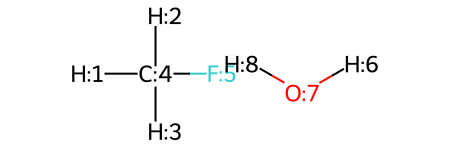

In [13]:
rxn_smi = "[H:1][C:4]([H:2])([H:3])[F:5]>[H:6][O:7][H:8]>[H:1][C:4]([H:2])([H:3]).[F:5]"
from_rxn_smi = ReactionDatapoint.from_smi(rxn_smi, y, keep_h=True)
from_rxn_smi.rct

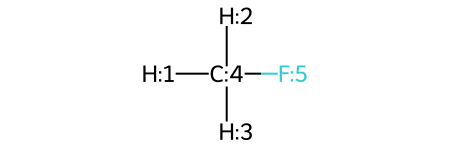

In [14]:
rct_smi = "[H:1][C:4]([H:2])([H:3])[F:5]"
pdt_smi = "[H:1][C:4]([H:2])([H:3]).[F:5]"
from_tuple = ReactionDatapoint.from_smi((rct_smi, pdt_smi), y, keep_h=True)
from_tuple.rct